In [1]:
import pandas as pd
import nltk
import re

In [2]:
data = pd.read_csv('IPhone-X_Review.csv', engine='python')
data

,Num,Review,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",NaN,NaN,NaN,NaN
1,1,This month it fell from 1149? to 999? in Germa...,NaN,NaN,NaN,NaN
2,2,"chopp, 16 Jan 2018hey guys iam confused betwee...",NaN,NaN,NaN,NaN
3,3,"chopp, 16 Jan 2018hey guys iam confused betwee...",NaN,NaN,NaN,NaN
4,4,hey guys iam confused between buying iphone x ...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
865,836,"Anonymous, 03 Nov 2017So Mr Mobile...fair play...",NaN,NaN,NaN,NaN
866,837,"Anonymous, 03 Nov 2017IPhone X is out.....*loo...",NaN,NaN,NaN,NaN
867,838,"Anonymous, 03 Nov 2017IPhone X is out.....*loo...",NaN,NaN,NaN,NaN
868,839,Why has Apple failed to make a long lasting ba...,NaN,NaN,NaN,NaN


In [3]:
# 결측치 확인
data['Review'].isnull().sum()

29

In [4]:
doc = data['Review'].dropna(axis=0)
doc

0      mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...
1      This month it fell from 1149? to 999? in Germa...
2      chopp, 16 Jan 2018hey guys iam confused betwee...
3      chopp, 16 Jan 2018hey guys iam confused betwee...
4      hey guys iam confused between buying iphone x ...
                             ...                        
865    Anonymous, 03 Nov 2017So Mr Mobile...fair play...
866    Anonymous, 03 Nov 2017IPhone X is out.....*loo...
867    Anonymous, 03 Nov 2017IPhone X is out.....*loo...
868    Why has Apple failed to make a long lasting ba...
869    IPhone X is out.....*looks at price tag*.........
Name: Review, Length: 841, dtype: object

In [5]:
# 텍스트 cleaning
def clean_text(text):
    
    pattern = re.compile('[\u3131-\u3163\uac00-\ud7a3]+')
    text = re.sub(pattern = pattern,repl = ' ',string = text) #한글삭제(인코딩 오류인지,,, 셿 이런 단어가 생기길래 삭제,,)
    
    pattern = '(\[a-zA-Z0-9\_.+-\]+@\[a-zA-Z0-9]+.\[a-zA-Z0-9-.\]+)' # email제거
    text = re.sub(pattern = pattern,repl = ' ',string = text)
    
    pattern = re.compile(r'([^\w]?\d+\.?\,?\)?\d*)+') # 숫자 제거
    text = re.sub(pattern = pattern,repl = ' ',string = text)
    
    pattern = '<[^>]*>' # html 태그 제거
    text = re.sub(pattern = pattern,repl = ' ',string = text)
    
    pattern = '[\r|\n]' # \r,\n 제거
    text = re.sub(pattern = pattern,repl = ' ',string = text)
    
    pattern =  '[^\w\s]' # 특수기호 제거
    text = re.sub(pattern = pattern,repl = ' ',string = text)
    
    pattern = re.compile(r'\s+')  #  이중 space 제거
    text = re.sub(pattern = pattern,repl = ' ',string = text)

    text = text.lower()
    return text

In [6]:
doc = doc.apply(clean_text)
doc

0      mir jan my huawei mate pro is already two week...
1      this month it fell from to in germany via rese...
2      chopp jan hey guys iam confused between buying...
3      chopp jan hey guys iam confused between buying...
4      hey guys iam confused between buying iphone x ...
                             ...                        
865    anonymous nov so mr mobile fair play but the q...
866    anonymous nov iphone x is out looks at price t...
867    anonymous nov iphone x is out looks at price t...
868    why has apple failed to make a long lasting ba...
869    iphone x is out looks at price tag oh i think ...
Name: Review, Length: 841, dtype: object

### 1. Tokenizing

In [7]:
from nltk.tokenize import wordpunct_tokenize
wordpunct_tokenize_result = doc.apply(wordpunct_tokenize)

In [8]:
print(wordpunct_tokenize_result)

0      [mir, jan, my, huawei, mate, pro, is, already,...
1      [this, month, it, fell, from, to, in, germany,...
2      [chopp, jan, hey, guys, iam, confused, between...
3      [chopp, jan, hey, guys, iam, confused, between...
4      [hey, guys, iam, confused, between, buying, ip...
                             ...                        
865    [anonymous, nov, so, mr, mobile, fair, play, b...
866    [anonymous, nov, iphone, x, is, out, looks, at...
867    [anonymous, nov, iphone, x, is, out, looks, at...
868    [why, has, apple, failed, to, make, a, long, l...
869    [iphone, x, is, out, looks, at, price, tag, oh...
Name: Review, Length: 841, dtype: object


### 2. POS tagging

In [9]:
pos_result = wordpunct_tokenize_result.apply(nltk.pos_tag)
print(pos_result)

0      [(mir, NN), (jan, NN), (my, PRP$), (huawei, NN...
1      [(this, DT), (month, NN), (it, PRP), (fell, VB...
2      [(chopp, NN), (jan, NN), (hey, NN), (guys, NNS...
3      [(chopp, NN), (jan, NN), (hey, NN), (guys, NNS...
4      [(hey, NN), (guys, NNS), (iam, VBP), (confused...
                             ...                        
865    [(anonymous, JJ), (nov, NNS), (so, RB), (mr, R...
866    [(anonymous, JJ), (nov, CC), (iphone, JJ), (x,...
867    [(anonymous, JJ), (nov, CC), (iphone, JJ), (x,...
868    [(why, WRB), (has, VBZ), (apple, NN), (failed,...
869    [(iphone, NN), (x, NN), (is, VBZ), (out, RP), ...
Name: Review, Length: 841, dtype: object


### 3. Stopword 제거

In [10]:
import string
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer  = WordNetLemmatizer()
stopwords   = set(stopwords.words('english'))
punctuation = string.punctuation

In [11]:
def remove_stopwords(text):
    remove_sw = [w for w in text if w not in stopwords and w not in punctuation]
    return remove_sw

In [12]:
stopwords_removed = wordpunct_tokenize_result.apply(remove_stopwords)
stopwords_removed

0      [mir, jan, huawei, mate, pro, already, two, we...
1      [month, fell, germany, via, resellers, hoping,...
2      [chopp, jan, hey, guys, iam, confused, buying,...
3      [chopp, jan, hey, guys, iam, confused, buying,...
4      [hey, guys, iam, confused, buying, iphone, x, ...
                             ...                        
865    [anonymous, nov, mr, mobile, fair, play, quest...
866    [anonymous, nov, iphone, x, looks, price, tag,...
867    [anonymous, nov, iphone, x, looks, price, tag,...
868        [apple, failed, make, long, lasting, battery]
869    [iphone, x, looks, price, tag, oh, think, stil...
Name: Review, Length: 841, dtype: object

### 4. Stemming

In [13]:
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')

In [14]:
def stemming(text):
    stemmed_text = [snowball.stem(t) for t in text]
    return stemmed_text

In [15]:
stem = stopwords_removed.apply(stemming)
stem

0      [mir, jan, huawei, mate, pro, alreadi, two, we...
1      [month, fell, germani, via, resel, hope, conti...
2      [chopp, jan, hey, guy, iam, confus, buy, iphon...
3      [chopp, jan, hey, guy, iam, confus, buy, iphon...
4      [hey, guy, iam, confus, buy, iphon, x, huawei,...
                             ...                        
865    [anonym, nov, mr, mobil, fair, play, question,...
866    [anonym, nov, iphon, x, look, price, tag, oh, ...
867    [anonym, nov, iphon, x, look, price, tag, oh, ...
868              [appl, fail, make, long, last, batteri]
869    [iphon, x, look, price, tag, oh, think, still,...
Name: Review, Length: 841, dtype: object

In [16]:
# 데이터프레임으로 예쁘게!!
df = pd.DataFrame({'Reviews' : doc, 'tokenize' : wordpunct_tokenize_result,
                  'pos_tag' : pos_result, 'remove_sw' : stopwords_removed,
                  'stemming' : stem})
df

,Reviews,tokenize,pos_tag,remove_sw,stemming
0,mir jan my huawei mate pro is already two week...,"[mir, jan, my, huawei, mate, pro, is, already,...","[(mir, NN), (jan, NN), (my, PRP$), (huawei, NN...","[mir, jan, huawei, mate, pro, already, two, we...","[mir, jan, huawei, mate, pro, alreadi, two, we..."
1,this month it fell from to in germany via rese...,"[this, month, it, fell, from, to, in, germany,...","[(this, DT), (month, NN), (it, PRP), (fell, VB...","[month, fell, germany, via, resellers, hoping,...","[month, fell, germani, via, resel, hope, conti..."
2,chopp jan hey guys iam confused between buying...,"[chopp, jan, hey, guys, iam, confused, between...","[(chopp, NN), (jan, NN), (hey, NN), (guys, NNS...","[chopp, jan, hey, guys, iam, confused, buying,...","[chopp, jan, hey, guy, iam, confus, buy, iphon..."
3,chopp jan hey guys iam confused between buying...,"[chopp, jan, hey, guys, iam, confused, between...","[(chopp, NN), (jan, NN), (hey, NN), (guys, NNS...","[chopp, jan, hey, guys, iam, confused, buying,...","[chopp, jan, hey, guy, iam, confus, buy, iphon..."
4,hey guys iam confused between buying iphone x ...,"[hey, guys, iam, confused, between, buying, ip...","[(hey, NN), (guys, NNS), (iam, VBP), (confused...","[hey, guys, iam, confused, buying, iphone, x, ...","[hey, guy, iam, confus, buy, iphon, x, huawei,..."
...,...,...,...,...,...
865,anonymous nov so mr mobile fair play but the q...,"[anonymous, nov, so, mr, mobile, fair, play, b...","[(anonymous, JJ), (nov, NNS), (so, RB), (mr, R...","[anonymous, nov, mr, mobile, fair, play, quest...","[anonym, nov, mr, mobil, fair, play, question,..."
866,anonymous nov iphone x is out looks at price t...,"[anonymous, nov, iphone, x, is, out, looks, at...","[(anonymous, JJ), (nov, CC), (iphone, JJ), (x,...","[anonymous, nov, iphone, x, looks, price, tag,...","[anonym, nov, iphon, x, look, price, tag, oh, ..."
867,anonymous nov iphone x is out looks at price t...,"[anonymous, nov, iphone, x, is, out, looks, at...","[(anonymous, JJ), (nov, CC), (iphone, JJ), (x,...","[anonymous, nov, iphone, x, looks, price, tag,...","[anonym, nov, iphon, x, look, price, tag, oh, ..."
868,why has apple failed to make a long lasting ba...,"[why, has, apple, failed, to, make, a, long, l...","[(why, WRB), (has, VBZ), (apple, NN), (failed,...","[apple, failed, make, long, lasting, battery]","[appl, fail, make, long, last, batteri]"


### 5. 빈도수 시각화

In [17]:
def flatten(l):
    flatList=[]
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

In [18]:
tokens = nltk.Text(flatten(stem))

In [19]:
# 빈도수 상위 50개
tokens.vocab().most_common(50)

[('iphon', 822),
 ('appl', 544),
 ('phone', 519),
 ('x', 511),
 ('samsung', 289),
 ('nov', 286),
 ('like', 251),
 ('use', 235),
 ('android', 218),
 ('screen', 202),
 ('best', 159),
 ('dec', 151),
 ('better', 149),
 ('display', 148),
 ('face', 147),
 ('anonym', 146),
 ('look', 146),
 ('one', 140),
 ('buy', 139),
 ('get', 127),
 ('peopl', 126),
 ('price', 119),
 ('even', 115),
 ('note', 111),
 ('make', 109),
 ('say', 109),
 ('id', 108),
 ('also', 106),
 ('think', 105),
 ('time', 103),
 ('realli', 103),
 ('year', 103),
 ('u', 100),
 ('plus', 100),
 ('batteri', 96),
 ('work', 95),
 ('would', 93),
 ('new', 93),
 ('notch', 88),
 ('good', 87),
 ('problem', 86),
 ('much', 86),
 ('go', 81),
 ('devic', 81),
 ('know', 79),
 ('user', 78),
 ('thing', 73),
 ('camera', 71),
 ('app', 69),
 ('issu', 68)]

In [20]:
import matplotlib.pyplot as plt

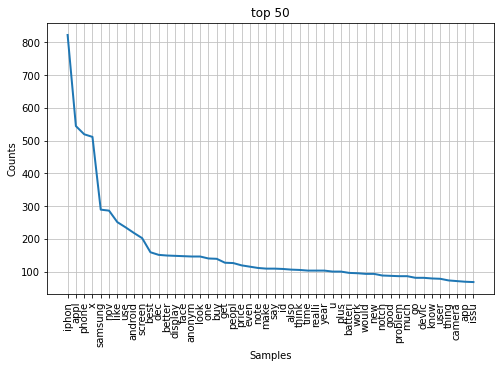

In [21]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('top 50')
tokens.plot(50)

### 명사 상위 50개 추출

In [22]:
def only_nouns(token_pos):
    nouns = []
    for word, pos in token_pos:
        if 'NN' in pos:
            nouns.append(word)
    return nouns

In [23]:
nouns = pos_result.apply(only_nouns)
print(nouns)

0        [mir, jan, huawei, weeks, android, sho, moreno]
1                                     [month, resellers]
2      [chopp, jan, hey, guys, iphone, x, y, please, ...
3      [chopp, jan, hey, guys, iphone, x, y, please, ...
4                [hey, guys, iphone, x, y, please, help]
                             ...                        
865    [nov, play, question, yeah, sellers, profits, ...
866    [x, looks, price, tag, i, kidneylol, ur, kidne...
867    [x, looks, price, tag, i, kidneydon, t, joke, ...
868                            [apple, lasting, battery]
869            [iphone, x, looks, price, tag, i, kidney]
Name: Review, Length: 841, dtype: object


In [24]:
# 불용어 제거
stopwords_removed_nouns = nouns.apply(remove_stopwords)
stopwords_removed_nouns

0        [mir, jan, huawei, weeks, android, sho, moreno]
1                                     [month, resellers]
2       [chopp, jan, hey, guys, iphone, x, please, help]
3      [chopp, jan, hey, guys, iphone, x, please, pit...
4                   [hey, guys, iphone, x, please, help]
                             ...                        
865    [nov, play, question, yeah, sellers, profits, ...
866    [x, looks, price, tag, kidneylol, ur, kidney, ...
867    [x, looks, price, tag, kidneydon, joke, fools,...
868                            [apple, lasting, battery]
869               [iphone, x, looks, price, tag, kidney]
Name: Review, Length: 841, dtype: object

In [25]:
stem_nouns = stopwords_removed_nouns.apply(stemming)
stem_nouns

0         [mir, jan, huawei, week, android, sho, moreno]
1                                         [month, resel]
2          [chopp, jan, hey, guy, iphon, x, pleas, help]
3      [chopp, jan, hey, guy, iphon, x, pleas, pit, k...
4                      [hey, guy, iphon, x, pleas, help]
                             ...                        
865    [nov, play, question, yeah, seller, profit, bu...
866    [x, look, price, tag, kidneylol, ur, kidney, p...
867    [x, look, price, tag, kidneydon, joke, fool, i...
868                                [appl, last, batteri]
869                 [iphon, x, look, price, tag, kidney]
Name: Review, Length: 841, dtype: object

In [26]:
# 데이터프레임으로 예쁘게!!
df_noun = pd.DataFrame({'Reviews' : doc, 'tokenize' : wordpunct_tokenize_result,
                  'pos_tag' : pos_result, 'nouns' : nouns, 'remove_sw' : stopwords_removed_nouns,
                  'stemming' : stem_nouns})
df_noun

,Reviews,tokenize,pos_tag,nouns,remove_sw,stemming
0,mir jan my huawei mate pro is already two week...,"[mir, jan, my, huawei, mate, pro, is, already,...","[(mir, NN), (jan, NN), (my, PRP$), (huawei, NN...","[mir, jan, huawei, weeks, android, sho, moreno]","[mir, jan, huawei, weeks, android, sho, moreno]","[mir, jan, huawei, week, android, sho, moreno]"
1,this month it fell from to in germany via rese...,"[this, month, it, fell, from, to, in, germany,...","[(this, DT), (month, NN), (it, PRP), (fell, VB...","[month, resellers]","[month, resellers]","[month, resel]"
2,chopp jan hey guys iam confused between buying...,"[chopp, jan, hey, guys, iam, confused, between...","[(chopp, NN), (jan, NN), (hey, NN), (guys, NNS...","[chopp, jan, hey, guys, iphone, x, y, please, ...","[chopp, jan, hey, guys, iphone, x, please, help]","[chopp, jan, hey, guy, iphon, x, pleas, help]"
3,chopp jan hey guys iam confused between buying...,"[chopp, jan, hey, guys, iam, confused, between...","[(chopp, NN), (jan, NN), (hey, NN), (guys, NNS...","[chopp, jan, hey, guys, iphone, x, y, please, ...","[chopp, jan, hey, guys, iphone, x, please, pit...","[chopp, jan, hey, guy, iphon, x, pleas, pit, k..."
4,hey guys iam confused between buying iphone x ...,"[hey, guys, iam, confused, between, buying, ip...","[(hey, NN), (guys, NNS), (iam, VBP), (confused...","[hey, guys, iphone, x, y, please, help]","[hey, guys, iphone, x, please, help]","[hey, guy, iphon, x, pleas, help]"
...,...,...,...,...,...,...
865,anonymous nov so mr mobile fair play but the q...,"[anonymous, nov, so, mr, mobile, fair, play, b...","[(anonymous, JJ), (nov, NNS), (so, RB), (mr, R...","[nov, play, question, yeah, sellers, profits, ...","[nov, play, question, yeah, sellers, profits, ...","[nov, play, question, yeah, seller, profit, bu..."
866,anonymous nov iphone x is out looks at price t...,"[anonymous, nov, iphone, x, is, out, looks, at...","[(anonymous, JJ), (nov, CC), (iphone, JJ), (x,...","[x, looks, price, tag, i, kidneylol, ur, kidne...","[x, looks, price, tag, kidneylol, ur, kidney, ...","[x, look, price, tag, kidneylol, ur, kidney, p..."
867,anonymous nov iphone x is out looks at price t...,"[anonymous, nov, iphone, x, is, out, looks, at...","[(anonymous, JJ), (nov, CC), (iphone, JJ), (x,...","[x, looks, price, tag, i, kidneydon, t, joke, ...","[x, looks, price, tag, kidneydon, joke, fools,...","[x, look, price, tag, kidneydon, joke, fool, i..."
868,why has apple failed to make a long lasting ba...,"[why, has, apple, failed, to, make, a, long, l...","[(why, WRB), (has, VBZ), (apple, NN), (failed,...","[apple, lasting, battery]","[apple, lasting, battery]","[appl, last, batteri]"


In [27]:
tokens_nouns = nltk.Text(flatten(stem_nouns))

In [28]:
# 빈도수 상위 50개
tokens_nouns.vocab().most_common(50)

[('iphon', 693),
 ('appl', 543),
 ('phone', 516),
 ('x', 449),
 ('samsung', 209),
 ('screen', 184),
 ('display', 138),
 ('nov', 138),
 ('peopl', 126),
 ('dec', 126),
 ('face', 121),
 ('price', 114),
 ('year', 103),
 ('note', 100),
 ('time', 99),
 ('android', 93),
 ('id', 89),
 ('batteri', 88),
 ('problem', 86),
 ('devic', 81),
 ('notch', 81),
 ('thing', 73),
 ('camera', 71),
 ('user', 68),
 ('day', 68),
 ('issu', 67),
 ('way', 65),
 ('jan', 64),
 ('opinion', 54),
 ('design', 52),
 ('game', 50),
 ('io', 49),
 ('video', 49),
 ('button', 48),
 ('smartphon', 48),
 ('app', 47),
 ('lot', 45),
 ('money', 45),
 ('scanner', 45),
 ('duel', 44),
 ('fan', 44),
 ('fact', 44),
 ('featur', 43),
 ('noth', 43),
 ('someth', 42),
 ('reason', 41),
 ('home', 40),
 ('product', 39),
 ('gb', 38),
 ('market', 37)]

In [29]:
import matplotlib.pyplot as plt

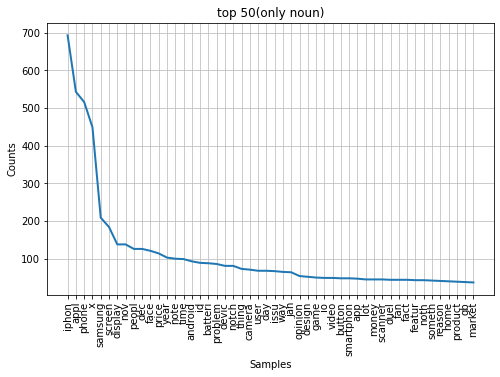

In [30]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('top 50(only noun)')
tokens_nouns.plot(50)